<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/hartree_fock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hartree-Fock (HF-SCF)**

In [ ]:
!pip install pyscf geometric -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.0/386.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 15.1 MB/s eta 0:00:00


In [ ]:
from pyscf import gto

# Define the molecule
mol = gto.Mole()
mol.atom = '''
    N  0.0000  0.0000  0.2000
    H  0.0000  0.9433 -0.2000
    H  0.8165 -0.4717 -0.2000
    H -0.8165 -0.4717 -0.2000
'''

# Name
molecule = 'Ammonia (NH₃)'

# Set basis set
mol.basis = 'cc-pvdz' # Alternatively: sto-3g, cc-pvdz,6-31G

# Define the molecule using gto.M() function
mol.atom = mol.atom
mol.basis = mol.basis
mol.build()

*Ground State with HF-SCF*

converged SCF energy = -76.0267936449739


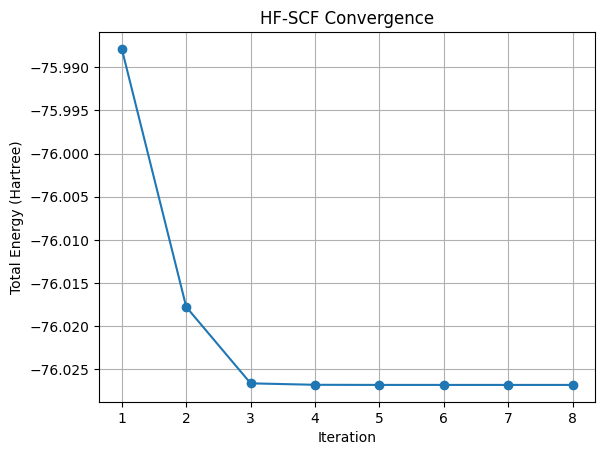

HF-SCF energy for H2O: -76.02679364497386 Hartree


In [ ]:
# Hartree-Fock SCF (Slater Determinant)
# First, ensure you have the PySCF package installed
from pyscf import gto, scf
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the molecule using gto.M() function
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a HF-SCF calculation using Restricted Hartree-Fock (RHF) method

# scf.RHF for a restricted Hartree-Fock calculation for a closed-shell system (H₂O)
mf = scf.RHF(mol)

# Store convergence data
conv_data = []

# Callback function to collect convergence information
# (callback function captures energy values at each iteration to track the convergence process)
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform HF calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot the convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()

print(f"HF-SCF energy for H2O: {energy} Hartree")

In [ ]:
# Hartree-Fock Hamiltonian includes electron-electron interaction in form of exchange integrals.
# In Hartree-Fock theory, electrons are described using a Slater determinant of single-particle orbitals,
# and Hamiltonian includes terms for the kinetic energy, electron-nuclear attraction, and electron-electron repulsion

from pyscf import gto, scf

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -76.0267936449738


-76.02679364497384

*HF-SCF Core Hamiltonian matrix*

In [ ]:
# Core Hamiltonian matrix represents one-electron part of molecular Hamiltonian
# = kinetic energy operator of electrons and electrostatic attraction operator between electrons and nuclei
# Core Hamiltonian does not include electron-electron interactions

# Get the core Hamiltonian (kinetic + nuclear attraction)
core_hamiltonian = mf.get_hcore()
print("Core Hamiltonian matrix (Hcore):\n", core_hamiltonian)

Core Hamiltonian matrix (Hcore):
 [[-3.30266742e+01  7.86885373e+00 -5.92940699e+00  0.00000000e+00
   0.00000000e+00 -3.06478075e-02  0.00000000e+00  0.00000000e+00
  -5.73180346e-03  0.00000000e+00  0.00000000e+00 -3.84923952e-04
   0.00000000e+00  3.35894308e-03 -1.62279641e+00 -2.10585214e+00
   0.00000000e+00  2.68023438e+00  2.07311975e+00 -1.62279641e+00
  -2.10585214e+00  0.00000000e+00 -2.68023438e+00  2.07311975e+00]
 [ 7.86885373e+00 -1.02785814e+01 -5.04442940e+00  0.00000000e+00
   0.00000000e+00 -1.70475422e-01  0.00000000e+00  0.00000000e+00
  -1.15911214e-01  0.00000000e+00  0.00000000e+00 -9.37449906e-03
   0.00000000e+00  8.18042331e-02 -2.14274568e+00 -2.44231854e+00
   0.00000000e+00  2.30454912e+00  1.75477703e+00 -2.14274568e+00
  -2.44231854e+00  0.00000000e+00 -2.30454912e+00  1.75477703e+00]
 [-5.92940699e+00 -5.04442940e+00 -7.61956807e+00  0.00000000e+00
   0.00000000e+00 -1.77925761e-01  0.00000000e+00  0.00000000e+00
  -2.42181267e-01  0.00000000e+00  0.000

*HF-SCF Fock Matrix*

In [ ]:
# Fock matrix approximates many-electron wavefunction of system (H₂O),
# i.e. approximates interactions between electrons in a system to find an optimal set of orbitals.
# It gives snapshot of molecule electronic structure, incl. energies of molecular orbitals and how they interact or mix

# Get the Fock matrix (core Hamiltonian + electron-electron interaction terms)
fock_matrix = mf.get_fock()
print("Fock Matrix (Hartree-Fock Hamiltonian):\n", fock_matrix)

Fock Matrix (Hartree-Fock Hamiltonian):
 [[-2.05503070e+01  4.42448190e+00 -3.95660733e+00 -2.93828883e-18
  -6.93889390e-17 -2.41662208e-02  6.62141105e-19 -7.37257477e-18
  -6.01764295e-03 -1.53057002e-17 -1.46367293e-17 -5.01310614e-05
   1.10536658e-17 -1.20872661e-03 -1.09323297e+00 -1.41449454e+00
  -6.58948219e-19  1.78970445e+00  1.38345313e+00 -1.09323297e+00
  -1.41449454e+00  2.89195621e-18 -1.78970445e+00  1.38345313e+00]
 [ 4.42448190e+00 -1.77436135e+00 -3.63157077e-01 -7.13924528e-17
  -1.73472348e-16 -4.06665759e-02 -2.39975024e-17 -5.46437895e-17
  -6.01372077e-02 -1.08335787e-17 -7.97972799e-17 -6.84863507e-03
   7.06966341e-18  8.57775181e-02 -4.45334301e-01 -4.42871045e-01
  -8.82913808e-18  4.43589556e-02  3.68621936e-02 -4.45334301e-01
  -4.42871045e-01 -1.62154088e-17 -4.43589556e-02  3.68621936e-02]
 [-3.95660733e+00 -3.63157077e-01 -1.81678753e+00 -1.90255459e-17
  -1.30104261e-16 -9.49263136e-02 -9.76938361e-18 -5.11743425e-17
  -1.76260013e-01 -8.98638036e-18

In [ ]:
print("Fock Matrix Shape:", fock_matrix.shape)
print("Fock Matrix Size:", fock_matrix.size)
print("Fock Matrix Dimension:", fock_matrix.ndim)
print("Fock Matrix Trace:", np.trace(fock_matrix))
print("Fock Matrix Determinant:", np.linalg.det(fock_matrix))
print("Fock Matrix Rank:", np.linalg.matrix_rank(fock_matrix))

Fock Matrix Shape: (24, 24)
Fock Matrix Size: 576
Fock Matrix Dimension: 2
Fock Matrix Trace: -5.927529968220448
Fock Matrix Determinant: -0.3799637617374651
Fock Matrix Rank: 24


* **Shape**: corresponds to 24 basis functions (molecular orbitals) used to describe water molecule (H₂O) = 1s orbitals of the hydrogen atoms + oxygen atom's $2s, 2p_x, 2p_y$, and $2p_z$ orbitals + additional basis functions from higher-order functions like polarization or diffuse functions depending on theory or basis set (e.g., STO-3G, 6-31G, etc.)
* **Size**: 24 x 24 = 576. All interactions between 24 orbitals (both diagonal and off-diagonal). Represent pairwise interactions between orbitals as N x N matrix. Each element $F_ij$ corresponds to interaction between orbital i and orbital j.
* **Trace**: diagonal elements correspond to one-electron energies of molecular orbitals. In stable molecule like water, most electrons occupy bound molecular orbitals with negative energies (relative to free electron), hence a negative trace. Magnitude of trace depends on the specific molecular orbitals' energy levels, which are influenced by the electron-nuclear and electron-electron interactions in the Hartree-Fock approximation.
* **Rank**: = number of linearly independent rows or columns. Rank is 24 (equal to number of rows/columns) = all 24 molecular orbitals are linearly independent, none redundant - expected in Hartree-Fock calculation where each basis function represents a unique molecular orbital.
* **Determinant**: insights into matrix's invertibility and system's stability.
  * A determinant close to zero (but not exactly zero) typically suggests that the matrix is close to being singular, meaning it is almost non-invertible. This could imply that some of the molecular orbitals are nearly degenerate or that the system is on the verge of instability.
  * A negative determinant indicates a specific symmetry property or interaction of the molecular orbitals, but the exact physical meaning is more abstract in this context.
  * -0.38 suggests that there are significant interactions between orbitals, but system remains stable, as determinant is not zero.


*HF-SCF Molecular Orbital Coefficients for All Orbitals (occupied and unoccupied)*

In [ ]:
# Retrieve Hartree-Fock orbitals (related to the Slater determinant) - occupied and unoccupied
# Occupied orbitals: contain electrons in Hartree-Fock ground state
# Virtual orbitals: unoccupied in ground state but can be important for excited state or post-Hartree-Fock methods like MP2 or CISD (electronic correlation effects)

from pyscf import gto, scf

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Get the molecular orbitals (which form the Slater determinant)
mo_coeff = mf.mo_coeff  # Coefficients of the molecular orbitals in the atomic basis
mo_energy = mf.mo_energy  # Orbital energies

print("Molecular Orbital Coefficients (MO coefficients):\n", mo_coeff)
print("Molecular Orbital Energies:\n", mo_energy)

converged SCF energy = -76.0267936449739
Molecular Orbital Coefficients (MO coefficients):
 [[ 1.00089979e+00 -8.21604151e-03 -6.86246320e-16  2.16305736e-03
   6.47296608e-17 -5.20574216e-02  8.30693743e-16 -8.44229961e-16
  -6.51033846e-02  3.14639080e-03 -1.81592909e-16  1.62583386e-15
   2.02016030e-01  1.04801206e-15  3.21575224e-17 -7.24314862e-01
   1.06169494e-14 -4.84432281e-14  2.78505588e-01  1.45587799e-18
  -7.07716311e-17 -8.42916924e-02 -1.42425038e-01 -5.69476952e-15]
 [ 1.17545240e-03  4.42883335e-01  1.31494585e-16 -1.50393950e-01
  -2.17059965e-16  7.26049469e-02 -1.16448675e-15 -9.29869879e-15
  -2.55809190e-01  1.14706356e-01  8.44105039e-16  3.74676399e-15
   5.29322337e-01  2.72083792e-15  5.68660157e-17 -1.59283979e+00
   2.37338702e-14 -1.25541974e-13  7.29453105e-01 -2.39854028e-17
  -1.78245419e-16 -1.54240789e-01 -1.75143749e-01 -6.96748641e-15]
 [-2.66588259e-03  3.75739337e-01  7.62530806e-15 -3.49801235e-01
  -1.42254690e-15  1.00273972e+00 -1.44905350e-1

*HF-SCF Molecular Orbital Coefficients for only occupied orbitals*

In [ ]:
# Extract and display the occupied molecular orbitals - used to construct Slater determinant - Only occupied orbitals

# The mo_occ variable stores the occupation numbers, which are usually 2 for occupied orbitals
# in a closed-shell Hartree-Fock calculation (since there are two electrons per orbital in a closed-shell system).

# By identifying which orbitals are occupied using np.where(mo_occ > 0),
# the code extracts the coefficients corresponding to those occupied orbitals and prints them.

from pyscf import gto, scf
import numpy as np

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Get the molecular orbital coefficients
mo_coeff = mf.mo_coeff

# Get the occupation numbers (2 for occupied orbitals in closed-shell RHF)
mo_occ = mf.mo_occ

# Identify the indices of occupied orbitals
occupied_indices = np.where(mo_occ > 0)[0]

# Extract the coefficients of the occupied molecular orbitals
occupied_mo_coeff = mo_coeff[:, occupied_indices]

print("Occupied Molecular Orbital Coefficients:")
print(occupied_mo_coeff)

converged SCF energy = -76.0267936449739
Occupied Molecular Orbital Coefficients:
[[ 1.00089979e+00 -8.21604151e-03  6.38657091e-16  2.16305736e-03
   5.21477838e-17]
 [ 1.17545240e-03  4.42883335e-01 -2.61388851e-16 -1.50393950e-01
   3.64158439e-17]
 [-2.66588259e-03  3.75739337e-01 -8.00111905e-15 -3.49801235e-01
  -2.61384119e-16]
 [ 1.46402791e-20 -2.34467799e-16  1.54541576e-16 -7.98675256e-16
   6.31170514e-01]
 [-1.53193015e-17  5.19072523e-16  4.89970411e-01 -1.71773800e-15
   1.73944182e-16]
 [ 1.76288221e-03  7.88241662e-02  1.36378478e-15  5.45487762e-01
   5.14358625e-16]
 [-4.47982142e-20 -5.80418681e-17 -9.91945638e-17 -5.03083321e-16
   4.95654516e-01]
 [-5.44038209e-17 -5.68901080e-16  2.21871797e-01 -2.04076098e-15
  -8.92538427e-17]
 [-4.83847858e-04 -1.30882003e-02 -1.68913942e-15  3.65342068e-01
   7.28053638e-16]
 [ 7.30058623e-20  3.01007142e-18  4.86213696e-17  1.13287991e-18
   2.10443810e-17]
 [-2.15461780e-17 -2.61711767e-16  2.68096298e-02 -8.27340276e-17
  